# Walmart Sales Analysis
## By-Himanshi Garg

In [200]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [201]:
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = r'C:\Users\Admin\Desktop\Walmart Sales\Walmart Sales.xlsx'

# Read CSV file into a DataFrame
df = pd.read_excel(file_path)
print(df.head(5))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7   1/5/2019  13:08:00   
1  Electronic accessories       15.28         5   3/8/2019  10:29:00   
2      Home and lifestyle       46.33         7   3/3/2019  13:23:00   
3       Health and beauty       58.22         8  1/27/2019  20:33:00   
4       Sports and travel       86.31         7   2/8/2019  10:37:00   

       Payment  Rating  
0      Ewallet     9.1  
1         Cash     9.6  
2  Credit card     7.4  
3      Ewallet     8.4  
4      Ewallet     5.3  


# Descriptive Statistics

In [202]:
# Checking the data types of the variables of the dataset
data_types = df.dtypes
print(data_types)
# Checking for null values in the dataset
null_values = df.isnull().sum()
print(null_values)

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Date              object
Time              object
Payment           object
Rating           float64
dtype: object
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


In [203]:
#Performing basic descriptive statistics to understand the data

# Checking the description of the data
numerical_stats = df.describe()
print(numerical_stats)

# Display the correlation matrix for numerical columns
correlation_matrix = df.corr()
print("correlation_matrix", correlation_matrix)

        Unit price     Quantity      Rating
count  1000.000000  1000.000000  1000.00000
mean     55.672130     5.510000     6.97270
std      26.494628     2.923431     1.71858
min      10.080000     1.000000     4.00000
25%      32.875000     3.000000     5.50000
50%      55.230000     5.000000     7.00000
75%      77.935000     8.000000     8.50000
max      99.960000    10.000000    10.00000
correlation_matrix             Unit price  Quantity    Rating
Unit price    1.000000  0.010778 -0.008778
Quantity      0.010778  1.000000 -0.015815
Rating       -0.008778 -0.015815  1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_12792\3436497440.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [204]:
# Display the number of unique values in each column
unique_counts = df.nunique()
print(unique_counts)
# Display the unique values in the 'City' column
unique_cities = df['City'].unique()
print(unique_cities)
# Display the unique values in the 'Branch' column
unique_branches = df['Branch'].unique()
print(unique_branches)

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Unit price        943
Quantity           10
Date               89
Time              506
Payment             3
Rating             61
dtype: int64
['Yangon' 'Naypyitaw' 'Mandalay']
['A' 'B' 'C']


In [205]:
# Display the value counts for the 'Payment' column
payment_counts = df['Payment'].value_counts()
print("payment_counts",payment_counts)

# Display the value counts for the 'Gender' column
gender_counts = df['Gender'].value_counts()
print("gender_counts",gender_counts)

# Display the average rating
average_rating = df['Rating'].mean()
print("average_rating",average_rating)

# Display the maximum and minimum ratings
max_rating = df['Rating'].max()
min_rating = df['Rating'].min()
print("max_rating",max_rating)
print("min_rating",min_rating)

payment_counts Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64
gender_counts Female    501
Male      499
Name: Gender, dtype: int64
average_rating 6.9727
max_rating 10.0
min_rating 4.0


# Answers To The Assignment

## Answer 1 (a)

In [206]:
df['Revenue'] = df['Unit price'] * df['Quantity']
print(df.head(5))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      A  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      B     Yangon        Member    Male   
4  373-73-7910      C     Yangon        Normal    Male   

             Product line  Unit price  Quantity       Date      Time  \
0       Health and beauty       74.69         7   1/5/2019  13:08:00   
1  Electronic accessories       15.28         5   3/8/2019  10:29:00   
2      Home and lifestyle       46.33         7   3/3/2019  13:23:00   
3       Health and beauty       58.22         8  1/27/2019  20:33:00   
4       Sports and travel       86.31         7   2/8/2019  10:37:00   

       Payment  Rating  Revenue  
0      Ewallet     9.1   522.83  
1         Cash     9.6    76.40  
2  Credit card     7.4   324.31  
3      Ewallet     8.4   465.76  
4      Ewallet     5.3   604.17  


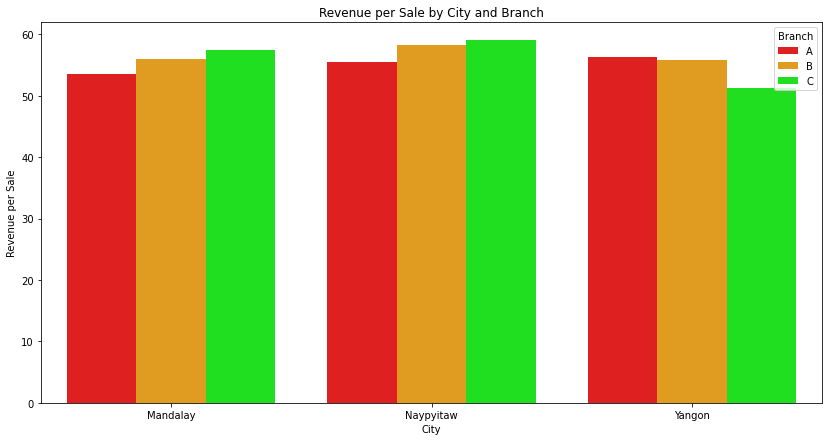

In [207]:
# Assuming you have a DataFrame named 'df' with the necessary columns

# Create a new DataFrame grouped by 'City', 'Branch'
grouped_data = df.groupby(['City', 'Branch']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculate revenue per sale
grouped_data['Revenue_per_sale'] = grouped_data['Revenue'] / grouped_data['Quantity']

# Pivot the DataFrame for better plotting
pivot_data = grouped_data.pivot_table(index=['City', 'Branch'], values='Revenue_per_sale', fill_value=0)

# Reset index for plotting
pivot_data.reset_index(inplace=True)

# Define a custom color palette
custom_palette = {'A': 'red', 'B': 'orange', 'C': 'lime'}

# Plotting the performance with grouped bars
fig, ax = plt.subplots(figsize=(14, 7))

# Use seaborn for better color management
sns.barplot(x='City', y='Revenue_per_sale', hue='Branch', data=pivot_data, palette=custom_palette, ax=ax)
ax.set_title('Revenue per Sale by City and Branch')
ax.set_xlabel('City')
ax.set_ylabel('Revenue per Sale')

plt.show()


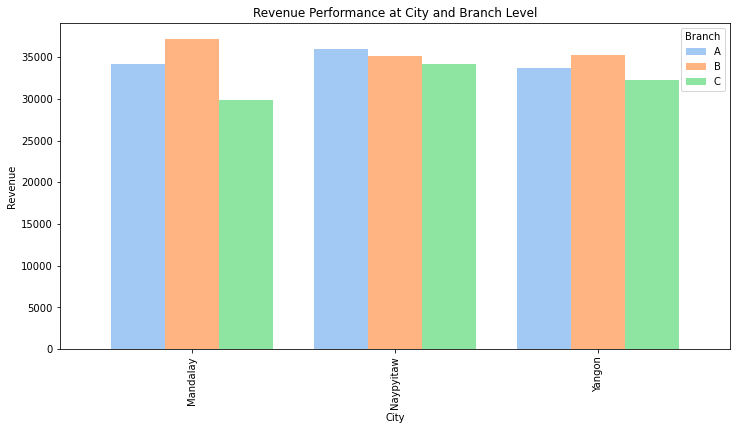

In [208]:
# Group by 'City' and 'Branch' and sum the 'Revenue'
revenue_by_city_branch = df.groupby(['City', 'Branch'])['Revenue'].sum().unstack()

# Plot side-by-side bar chart
ax = revenue_by_city_branch.plot(kind='bar', figsize=(12, 6), width=0.8)

# Set plot labels and title
plt.xlabel('City')
plt.ylabel('Revenue')
plt.title('Revenue Performance at City and Branch Level')

# Add legend
plt.legend(title='Branch', loc='upper right')

# Show the plot
plt.show()


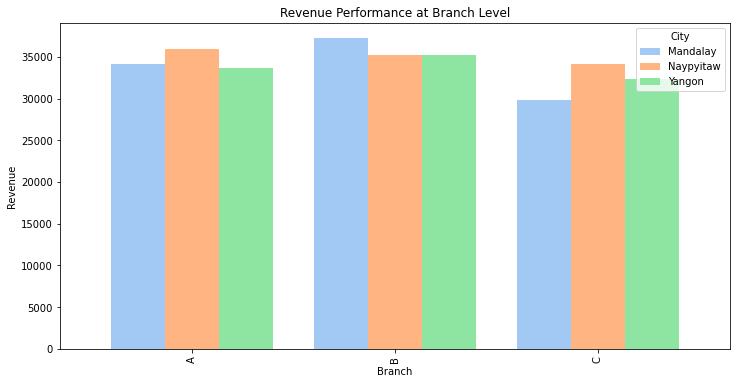

In [209]:
# Group by 'City' and 'Branch' and sum the 'Revenue'
revenue_by_branch_city = df.groupby(['Branch','City'])['Revenue'].sum().unstack()

# Plot side-by-side bar chart
ax = revenue_by_branch_city.plot(kind='bar', figsize=(12, 6), width=0.8)

# Set plot labels and title
plt.xlabel('Branch')
plt.ylabel('Revenue')
plt.title('Revenue Performance at Branch Level')

# Add legend with 'City' instead of 'Branch'
plt.legend(title='City', loc='upper right')

# Show the plot
plt.show()


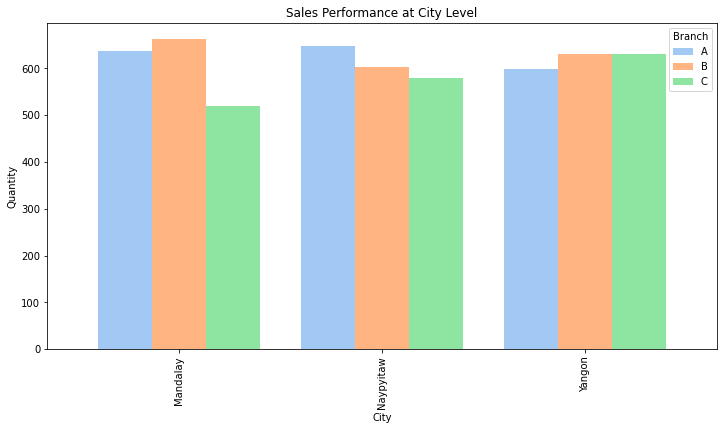

In [210]:
# Group by 'City' and 'Branch' and sum the 'Revenue'
sales_by_city_branch = df.groupby(['City', 'Branch'])['Quantity'].sum().unstack()

# Plot side-by-side bar chart
ax = sales_by_city_branch.plot(kind='bar', figsize=(12, 6), width=0.8)

# Set plot labels and title
plt.xlabel('City')
plt.ylabel('Quantity')
plt.title('Sales Performance at City Level')

# Add legend
plt.legend(title='Branch', loc='upper right')

# Show the plot
plt.show()

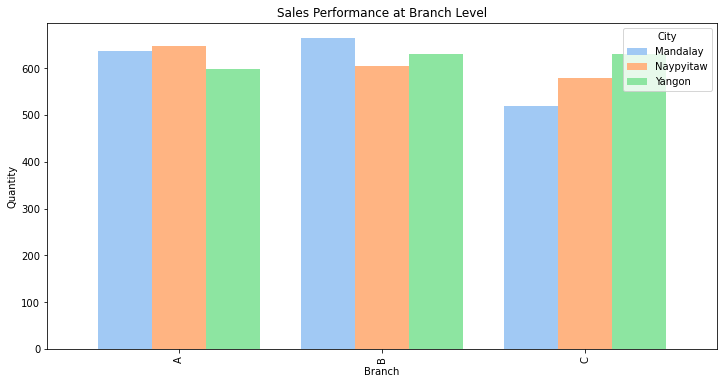

In [211]:
# Group by 'City' and 'Branch' and sum the 'Quantity'
sales_by_branch_city = df.groupby(['Branch','City'])['Quantity'].sum().unstack()

# Plot side-by-side bar chart
ax = sales_by_branch_city.plot(kind='bar', figsize=(12, 6), width=0.8)

# Set plot labels and title
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.title('Sales Performance at Branch Level')

# Add legend with 'City' instead of 'Branch'
plt.legend(title='City', loc='upper right')

# Show the plot
plt.show()

## The required analysis and visualisations has been obtained above.

## Answer 1 (b)

In [212]:
average_price_by_city_branch = df.groupby(['City', 'Branch','Product line'])['Unit price'].mean().reset_index()

print(average_price_by_city_branch)

         City Branch            Product line  Unit price
0    Mandalay      A  Electronic accessories   42.349500
1    Mandalay      A     Fashion accessories   57.112000
2    Mandalay      A      Food and beverages   51.687222
3    Mandalay      A       Health and beauty   58.569286
4    Mandalay      A      Home and lifestyle   55.106500
5    Mandalay      A       Sports and travel   55.538636
6    Mandalay      B  Electronic accessories   55.611364
7    Mandalay      B     Fashion accessories   51.172778
8    Mandalay      B      Food and beverages   53.733889
9    Mandalay      B       Health and beauty   55.745882
10   Mandalay      B      Home and lifestyle   59.114444
11   Mandalay      B       Sports and travel   60.008800
12   Mandalay      C  Electronic accessories   51.656923
13   Mandalay      C     Fashion accessories   55.337368
14   Mandalay      C      Food and beverages   62.815714
15   Mandalay      C       Health and beauty   59.826818
16   Mandalay      C      Home 

## Answer 1 (c)

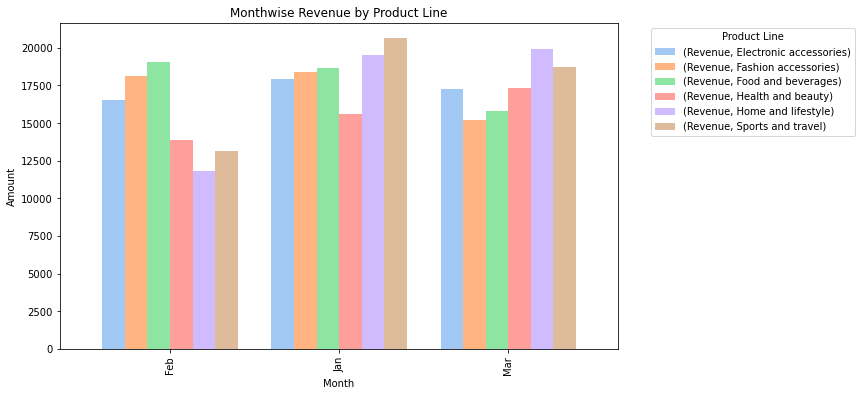

In [213]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate 'Revenue' by multiplying 'Sales' and 'Unit price'
df['Revenue'] = df['Quantity'] * df['Unit price']

# Group by 'Product line' and 'Month' and calculate sum of 'Sales' and 'Revenue'
monthly_data = df.groupby(['Product line', 'Month'])[['Revenue']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Pivot the DataFrame to have 'Product line' as columns
pivot_data = monthly_data.pivot(index='Month', columns='Product line', values=['Revenue'])

# Plot the data with bars side by side
pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust the width as needed

plt.title('Monthwise Revenue by Product Line')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


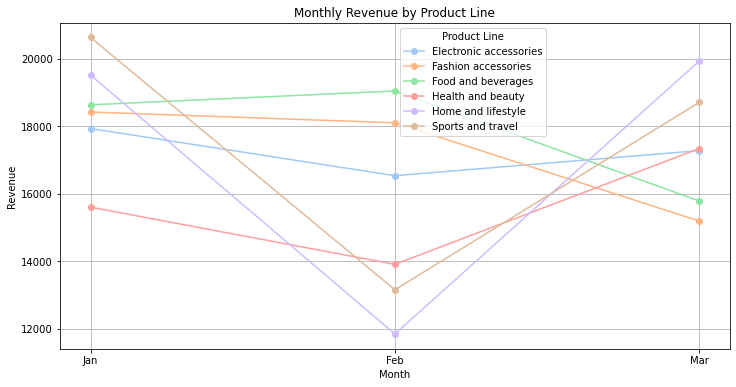

In [214]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Product line' and 'Month' and calculate sum of 'Revenue'
monthly_data = df.groupby(['Product line', 'Month'])[['Revenue']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot the data with a line chart
plt.figure(figsize=(12, 6))
for product_line, data in monthly_data.groupby('Product line'):
    plt.plot(data['Month'], data['Revenue'], label=product_line, marker='o')

# Customize the plot
plt.title('Monthly Revenue by Product Line')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product Line', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.grid(True)
plt.show()

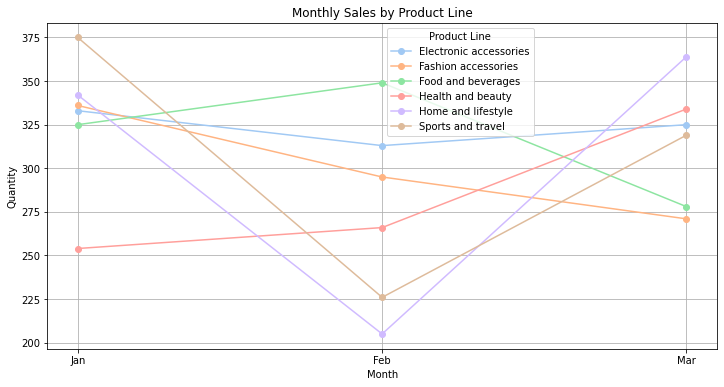

In [215]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Product line' and 'Month' and calculate sum of 'Quantity'
monthly_data = df.groupby(['Product line', 'Month'])[['Quantity']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot the data with a line chart
plt.figure(figsize=(12, 6))
for product_line, data in monthly_data.groupby('Product line'):
    plt.plot(data['Month'], data['Quantity'], label=product_line, marker='o')

# Customize the plot
plt.title('Monthly Sales by Product Line')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Product Line', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.grid(True)
plt.show()

### Based on the Sales and Revenue according to product line, I notice there has been an increase in the sales and revenue generated through Home & Lifestyle, Health & Lifestyle, Electronic accessories, Sports & travel whereas there is decline in Food & Bev and Fashion accessories, therefore, more attention should be paid to increase the sales in these two sectors.

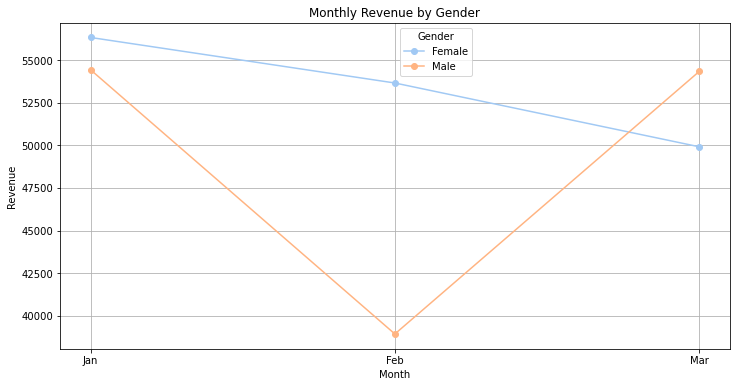

In [216]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Gender' and 'Month' and calculate sum of 'Revenue'
monthly_data = df.groupby(['Gender', 'Month'])[['Revenue']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot the data with a line chart
plt.figure(figsize=(12, 6))
for product_line, data in monthly_data.groupby('Gender'):
    plt.plot(data['Month'], data['Revenue'], label=product_line, marker='o')

# Customize the plot
plt.title('Monthly Revenue by Gender')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Gender', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.grid(True)
plt.show()

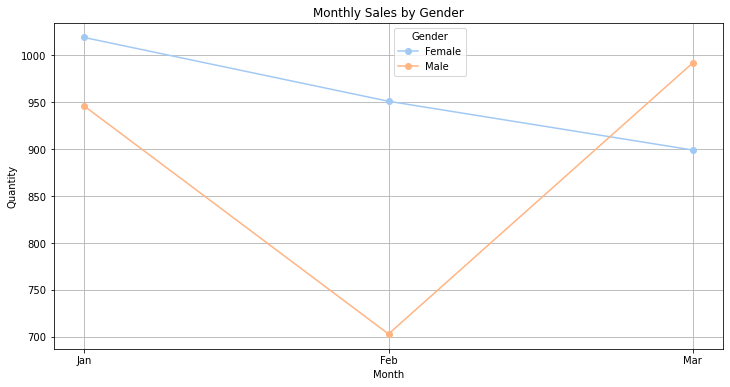

In [217]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Gender' and 'Month' and calculate sum of 'Quantity'
monthly_data = df.groupby(['Gender', 'Month'])[['Quantity']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot the data with a line chart
plt.figure(figsize=(12, 6))
for product_line, data in monthly_data.groupby('Gender'):
    plt.plot(data['Month'], data['Quantity'], label=product_line, marker='o')

# Customize the plot
plt.title('Monthly Sales by Gender')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Gender', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.grid(True)
plt.show()

### Based on the Sales and Revenue according to gender, I notice there has been an certain decline in the sales and revenue by male population whereas there is constant up & down in the sales and revenue generated by women, therefore, more attention should be paid to increase the revenue generated by men.

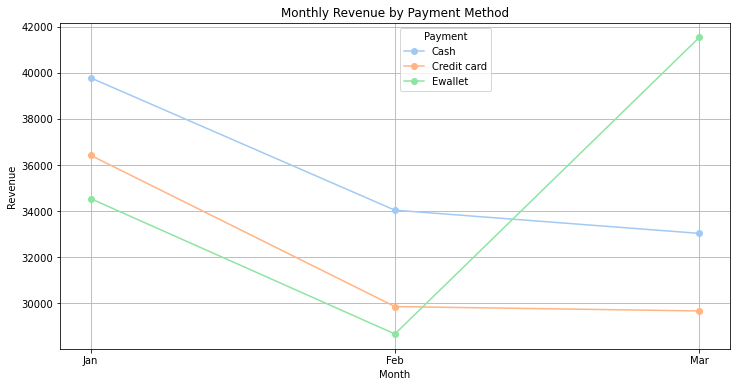

In [218]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Payment Method' and 'Month' and calculate sum of 'Revenue'
monthly_data = df.groupby(['Payment', 'Month'])[['Revenue']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot the data with a line chart
plt.figure(figsize=(12, 6))
for product_line, data in monthly_data.groupby('Payment'):
    plt.plot(data['Month'], data['Revenue'], label=product_line, marker='o')

# Customize the plot
plt.title('Monthly Revenue by Payment Method')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Payment', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.grid(True)
plt.show()

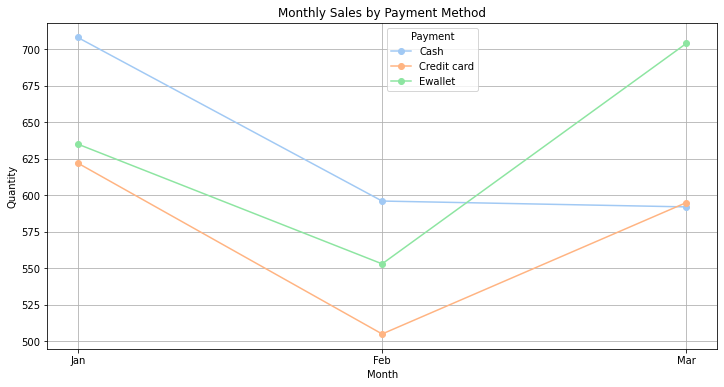

In [219]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by 'Payment Method' and 'Month' and calculate sum of 'Revenue'
monthly_data = df.groupby(['Payment', 'Month'])[['Quantity']].sum().reset_index()

# Use the calendar module to get month names
monthly_data['Month'] = monthly_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot the data with a line chart
plt.figure(figsize=(12, 6))
for product_line, data in monthly_data.groupby('Payment'):
    plt.plot(data['Month'], data['Quantity'], label=product_line, marker='o')

# Customize the plot
plt.title('Monthly Sales by Payment Method')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Payment', bbox_to_anchor=(0.5, 1), loc='upper left')
plt.grid(True)
plt.show()

### Based on the Sales and Revenue according to payment methods, I notice there has been an increase in the sales and revenue through credit cards and Ewallet whereas there is decline in cash payments, therefore, more attention should be paid to increase the sales through the cash.